[ランタイム] > [ランタイムのタイプの変更]でGPUになっているか確認

In [2]:
import torch                   # PyTorchのインポート
import torch.nn as nn
import torch.nn.functional as F #活性化関数など
print(torch.__version__)       # バージョン確認
print(torch.cuda.is_available()) # GPUが正しく利用できるかの確認
import numpy as np # numpyのインポート
import math
# cuda

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device", device)

ModuleNotFoundError: No module named 'torch'

Clay-Particle クラス


In [41]:
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


<IPython.core.display.Javascript object>


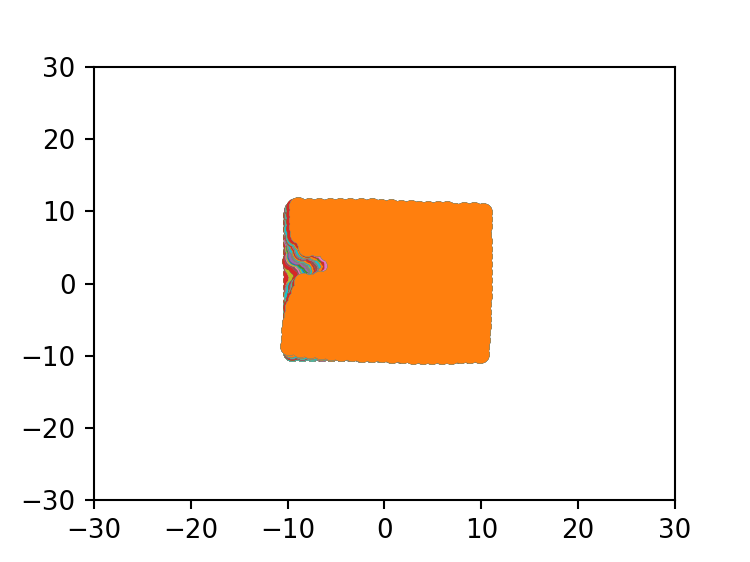

move 0
pos: [-11.8          0.73108479], vec: [0.09392913 0.04050532], vel: 0.1022905790538269
frame 0
0
0
frame 1
0
0
frame 2
0
0
frame 3
0
40
frame 4
0
0
frame 5
0
0
frame 6
0
0
frame 7
0
0
frame 8
0
84
frame 9
0
0
frame 10
0
0
frame 11
0
0
frame 12
0
0
frame 13
0
100
160
frame 14
0
0
frame 15
0
52
frame 16
0
35
frame 17
0
0
frame 18
0
50
frame 19
0
54
frame 20
0
41
frame 21
0
0
frame 22
0
52
frame 23
0
0
frame 24
0
61
frame 25
0
0
frame 26
0
0
frame 27
0
46
frame 28
0
0
frame 29
0
100
110
frame 30
0
0
frame 31
0
70
frame 32
0
0
frame 33
0
78
frame 34
0
0
frame 35
0
75
frame 36
0
0
frame 37
0
74
frame 38
0
0
frame 39
0
98
frame 40
0
0
frame 41
0
100
200
248
frame 42
0
0
frame 43
0
100
200
300
400
500
frame 44
0
0
frame 45
0
0
frame 46
0
77
frame 47
0
0
frame 48
0
0
0
12


In [124]:
import numpy as np # numpyのインポート
import math

%matplotlib notebook
import matplotlib.pyplot as plt 

plt.figure(figsize=(4.0, 3.0))
plt.xlim([-30,30])
plt.ylim([-30,30])




N = 5 #各マス最大の粒子数
dt = 0.05

class Particle():
    def __init__(self):
      self.r = 0.5
      self.m = 1

class Finger():
  def __init__(self, size=1.5, pos = np.zeros(2)):
    self.r = size
    self.m = math.pow(self.r * 2, 2)
    self.pos = pos

# class Clay():
#   def __init__(self):
#     np_area = np.full((720, 720, N), -1 , dtype=np.int) #720*720の範囲に各マス最大5個の粒子
#     np_pos = np.zeros((400, 2)) #400 * Vec2
#     np_pos_prev = np.zeros((400, 2))
#     # self.clay_area_2D = torch.from_numpy(np_area) #2D配列 (XY範囲: -500 ~ 500 = 1000 => sqrt(2)で割った大体720こ区分)
#     # self.clay_particles_pos = torch.from_numpy(np_pos) #Vec2配列
#     # self.clay_particles_pos_prev = torch.from_numpy(np_pos_prev) #Vec2配列
#     self.clay_area_2D = np_area #2D配列 (XY範囲: -500 ~ 500 = 1000)
#     self.clay_particles_pos = np_pos #Vec2配列
#     self.clay_particles_pos_prev = np_pos_prev #Vec2配列
#     self.k1 = 5.0
#     self.k2 = 50.0
#     self.k3 = 8.0
#     self.a = 1.05
#     self.b = 1.25
#     self.c = math.sqrt(2.0)
#     self.C = 5.0

#   @classmethod
#   def posToArea(cls, pos): #pos = (x,y)
#     return math.floor((pos[0]+500) * math.sqrt(2.0) * .5 + 0.5), math.floor((pos[1]+500) * math.sqrt(2.0) * .5 + 0.5)
#     # sqrt(2) * .5f = 1 / sqrt(2)

#   def simulate(self, fingers):
#     return_val = 0
#     self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)

#     # calc init force (=外力のみ)
#     fe = np.zeros((400, 2))
#     for f in fingers:
#       x_p, y_p = Clay.posToArea(f.pos + f.r)
#       x_m, y_m = Clay.posToArea(f.pos - f.r)
#       print(x_p, y_p, x_m, y_m)
#       for i in range(max([0, x_m - 1]), min([719, x_p + 2])):
#         for j in range(max([0, y_m - 1]), min([719, y_p + 2])):
#           for pos_index in self.clay_area_2D[i, j]:
#             if pos_index < 0:
#                 break
#             dist = np.linalg.norm(self.clay_particles_pos[pos_index] - f.pos)
#             d = dist / (f.r + 0.5)
#             if d < 1.0: #1.2にすることで指への引力も追加できる
# #               fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (51.5 * d * d * d - 85.25 * d * d + 33.75) #指との力 #Matsumiya(2000)を参考
#               fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (self.k1 * (1 - dist * dist)) #指との力 #Matsumiya(2000)を参考

#     # if np.all(fe == 0):
#       # return
#     # record initial move 
#     return_val = dt * 0.5 * (dt * fe)

    
#     #initialize
#     v = np.zeros((400, 2))
#     v_star = np.zeros((400, 2))
#     fi = np.zeros((400, 2))
  
#     ti = 0
#     while True:
#       count = 0
#       #self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
#       ac = fe + fi
# #       print("a")
#       if ti % 100 == 0:
#           print(ti)

#       # eq (7)
#       v_star = v + dt * ac
#       # self.clay_particles_pos += dt * 0.5 * (v + v_star)
#       diff = dt * 0.5 * (v + v_star)
#       self.clay_particles_pos += diff

#       # stable check
#       # diff = self.clay_particles_pos - self.clay_particles_pos_prev
#       stable_check = np.all(np.absolute(diff) < 1e-3)
# #       print(diff[np.absolute(diff) > 1e-4])
# #       print(self.clay_particles_pos)
# #       print(diff)
#       self.update_area()
#       if stable_check and not (ti == 0 and f == []):
#         print(ti)
#         break

#       ti += 1
#       if ti > 1500:
#         break


#       # eq(1)
#       fi = np.zeros((400, 2))
#       fe = np.zeros((400, 2))
      
#       # external force
#       for f in fingers:
#         x_p, y_p = Clay.posToArea(f.pos + f.r)
#         x_m, y_m = Clay.posToArea(f.pos - f.r)
#         for i in range(max([0, x_m - 1]), min([719, x_p + 2])):
#             for j in range(max([0, y_m - 1]), min([719, y_p + 2])):
#               for pos_index in self.clay_area_2D[i, j]:
#                 if pos_index < 0:
#                     break
#                 dist = np.linalg.norm(self.clay_particles_pos[pos_index] - f.pos)
#                 d = dist / (f.r + 0.5)
# #                 if d < 1.2:
# #                   fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (51.5 * d * d * d - 85.25 * d * d + 33.75) #指との力 #Matsumiya(2000)を参考
#                 if d < 1.0:
#                   fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (self.k1 * (1 - dist * dist)) #指との力 #Matsumiya(2000)を参考
#                 elif d > self.a and d < self.b:
#                   fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * ( -self.k2 * (dist - self.a) * (self.b - dist)) #指との力 #Matsumiya(2000)を参考

#       # internal force
#       for pos in self.clay_particles_pos:
#         x, y = Clay.posToArea(pos)
#         n = 0
#         fd = np.zeros(2)
#         fv = np.zeros(2)
#         v_sum = np.zeros(2)
#         for x_index in [x-1, x, x+1]:
#           for y_index in [y-1, y, y+1]:
#             for i in range(N):
#               index = self.clay_area_2D[x_index, y_index, i]
#               if index >= 0 and index != count:
#                 p = self.clay_particles_pos[index]
#                 dist = np.linalg.norm(pos - p)
#                 if dist < 1:
#                   fd += (pos - p) * self.k1 * (1 - dist * dist)
#                 elif dist < self.a:
#                   fd += 0
#                 elif dist < self.b:
#                   fd += (pos - p) * -self.k2 * (dist - self.a) * (self.b - dist)
#                 elif dist < self.c:
#                   fd += (pos - p) * self.k3 * (dist - self.b) * (self.c - dist)
#                 # 相対速度依存の摩擦力
#                 if dist < self.c:
#                   v_sum += v[index]
#                   n += 1
#         if n > 0:
#           fv = -self.C * (v[count] - v_sum / n)
#         fi[count] = fd + fv
#         count += 1
      
#       # eq(9)(8)
#       v += dt * 0.5 * (ac + fe + fi)
#       #plot
#       if ti % 100 == 0:
#           x_d = self.clay_particles_pos[:,0]
#           y_d = self.clay_particles_pos[:,1]
#           ln.set_data(x_d, y_d)
#           plt.draw()
#           plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
    
#     #end while
#     return return_val



#   def move_area(self, pos_index, x_prev, y_prev, x, y):#各particle移動をareaに反映
#     break_a = True
#     break_b = True
#     for i in range(N):
#       if break_a and self.clay_area_2D[x_prev, y_prev, i] == pos_index:
#         if i < N-1:
#           self.clay_area_2D[x_prev, y_prev, i:N-1] = self.clay_area_2D[x_prev, y_prev, i+1:N]
#         self.clay_area_2D[x_prev, y_prev, N-1] = -1
#         break_a = False
#       if break_b and self.clay_area_2D[x, y, i] == -1:
#         self.clay_area_2D[x, y, i] = pos_index
#         break_b = False

#   def update_area(self): #全particle移動をareaに反映
#     for count in range(len(self.clay_particles_pos)):
#       pos, prev_pos = self.clay_particles_pos[count], self.clay_particles_pos_prev[count]
#       if np.all(pos != prev_pos) and np.all(Clay.posToArea(prev_pos) != Clay.posToArea(pos)):
#         x_prev, y_prev = Clay.posToArea(prev_pos)
#         x, y = Clay.posToArea(pos)
#         self.move_area(count, x_prev, y_prev, x, y)


#   def make_area(self): #areaの初期化
#     count = 0
#     for pos in self.clay_particles_pos:
#       x, y = Clay.posToArea(pos)
#       for i in range(N):
#         if self.clay_area_2D[x, y, i] == -1:
#           self.clay_area_2D[x, y, i] = count
#           break
#       count += 1
 
#   def set_particle_square(self): #正方形に配置
#     for i in range(20):
#       for j in range(20):
#         x, y = i - 9.5, j - 9.5
#         self.clay_particles_pos[i * 20 + j, 0] = x
#         self.clay_particles_pos[i * 20 + j, 1] = y
#     self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
# #     ln, = plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
# #     plt.show()
    
#   def set_particle_square2(self): #正方形に配置
#     for i in range(20):
#       for j in range(20):
#         x, y = i - 9.5, j - 9.5
#         self.clay_particles_pos[i * 20 + j, 0] = x
#         self.clay_particles_pos[i * 20 + j, 1] = y
#     self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
#     ln, = plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
# #     plt.show()
    
    
class Clay():
  def __init__(self):
    np_area = np.full((720, 720, N), -1 , dtype=np.int) #720*720の範囲に各マス最大5個の粒子
    np_pos = np.zeros((400, 2)) #400 * Vec2
    np_pos_prev = np.zeros((400, 2))
    # self.clay_area_2D = torch.from_numpy(np_area) #2D配列 (XY範囲: -500 ~ 500 = 1000 => sqrt(2)で割った大体720こ区分)
    # self.clay_particles_pos = torch.from_numpy(np_pos) #Vec2配列
    # self.clay_particles_pos_prev = torch.from_numpy(np_pos_prev) #Vec2配列
    self.clay_area_2D = np_area #2D配列 (XY範囲: -500 ~ 500 = 1000)
    self.clay_particles_pos = np_pos #Vec2配列
    self.clay_particles_pos_prev = np_pos_prev #Vec2配列
    self.k1 = 5.0
    self.k2 = 50.0
    self.k3 = 8.0
    self.a = 1.1 #original 1.05
    self.b = 1.25
    self.c = math.sqrt(2.0)
    self.C = 5.0

  @classmethod
  def posToArea(cls, pos): #pos = (x,y)
    return math.floor((pos[0]+500) * math.sqrt(2.0) * .5 + 0.5), math.floor((pos[1]+500) * math.sqrt(2.0) * .5 + 0.5)
    # sqrt(2) * .5f = 1 / sqrt(2)

  def simulate(self, fingers):
    return_val = 0
    self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)

    # calc init force (=外力のみ)
    fe = np.zeros((400, 2))
    for f in fingers:
      x_p, y_p = Clay.posToArea(f.pos + f.r)
      x_m, y_m = Clay.posToArea(f.pos - f.r)
#       print(x_p, y_p, x_m, y_m)
      for i in range(max([0, x_m - 1]), min([719, x_p + 2])):
        for j in range(max([0, y_m - 1]), min([719, y_p + 2])):
          for pos_index in self.clay_area_2D[i, j]:
            if pos_index < 0:
                break
            dist = np.linalg.norm(self.clay_particles_pos[pos_index] - f.pos)
            d = dist / (f.r + 0.5)
            if d < 1.0: #1.2にすることで指への引力も追加できる
              fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (51.5 * d * d * d - 85.25 * d * d + 33.75) #指との力 #Matsumiya(2000)を参考

    # if np.all(fe == 0):
      # return
    # record initial move 
    return_val = dt * 0.5 * (dt * fe)

    
    #initialize
    v = np.zeros((400, 2))
    v_star = np.zeros((400, 2))
    fi = np.zeros((400, 2))
  
    ti = 0
    while True:
      count = 0
      #self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
      ac = fe + fi
#       print("a")
      if ti % 100 == 0:
          print(ti)

      # eq (7)
      v_star = v + dt * ac
      # self.clay_particles_pos += dt * 0.5 * (v + v_star)
      diff = dt * 0.5 * (v + v_star)
      self.clay_particles_pos += diff

      # stable check
      # diff = self.clay_particles_pos - self.clay_particles_pos_prev
      stable_check = np.all(np.absolute(diff) < 5e-3)
#       print(diff[np.absolute(diff) > 1e-4])
      self.update_area()
      if stable_check and not (ti == 0 and np.all(fe == 0)):
        print(ti)
        break

      ti += 1
      if ti > 500:#1500:
        break


      # eq(1)
      fi = np.zeros((400, 2))
      fe = np.zeros((400, 2))
      
      # external force
      for f in fingers:
        x_p, y_p = Clay.posToArea(f.pos + f.r)
        x_m, y_m = Clay.posToArea(f.pos - f.r)
        for i in range(max([0, x_m - 1]), min([720, x_p + 2])):
            for j in range(max([0, y_m - 1]), min([720, y_p + 2])):
              for pos_index in self.clay_area_2D[i, j]:
                if pos_index < 0:
                    break
                dist = np.linalg.norm(self.clay_particles_pos[pos_index] - f.pos)
                d = dist / (f.r + 0.5)
                if d < 1.2:
                  fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (51.5 * d * d * d - 85.25 * d * d + 33.75) #指との力 #Matsumiya(2000)を参考

      # internal force
      for pos in self.clay_particles_pos:
        x, y = Clay.posToArea(pos)
        n = 0
        fd = np.zeros(2)
        fv = np.zeros(2)
        v_sum = np.zeros(2)
        for x_index in [x-1, x, x+1]:
          for y_index in [y-1, y, y+1]:
            for i in range(N):
              index = self.clay_area_2D[x_index, y_index, i]
              if index >= 0 and index != count:
                p = self.clay_particles_pos[index]
                dist = np.linalg.norm(pos - p)
                if dist < 0.9:
                  fd += (pos - p) * self.k1 * (1 - dist * dist)
                elif dist < self.a:
                  fd += 0
                elif dist < self.b:
                  fd += (pos - p) * -self.k2 * (dist - self.a) * (self.b - dist)
                elif dist < self.c:
                  fd += (pos - p) * self.k3 * (dist - self.b) * (self.c - dist)
                # 相対速度依存の摩擦力
                if dist < self.c:
                  v_sum += v[index]
                  n += 1
        if n > 0:
          fv = -self.C * (v[count] - v_sum / n)
        fi[count] = fd + fv
        count += 1
      
      # eq(9)(8)
      v += dt * 0.5 * (ac + fe + fi)
      #plot
#       if ti % 100 == 0:
#           x_d = self.clay_particles_pos[:,0]
#           y_d = self.clay_particles_pos[:,1]
#           ln.set_data(x_d, y_d)
#           plt.draw()
#           plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
    
    #end while
    return return_val


  def move_area(self, pos_index, x_prev, y_prev, x, y):#各particle移動をareaに反映
    break_a = True
    break_b = True
    for i in range(N):
      if break_a and self.clay_area_2D[x_prev, y_prev, i] == pos_index:
        if i < N-1:
          self.clay_area_2D[x_prev, y_prev, i:N-1] = self.clay_area_2D[x_prev, y_prev, i+1:N]
        self.clay_area_2D[x_prev, y_prev, N-1] = -1
        break_a = False
      if break_b and self.clay_area_2D[x, y, i] == -1:
        self.clay_area_2D[x, y, i] = pos_index
        break_b = False

  def update_area(self): #全particle移動をareaに反映
    for count in range(len(self.clay_particles_pos)):
      pos, prev_pos = self.clay_particles_pos[count], self.clay_particles_pos_prev[count]
      if np.all(pos != prev_pos) and np.all(Clay.posToArea(prev_pos) != Clay.posToArea(pos)):
        x_prev, y_prev = Clay.posToArea(prev_pos)
        x, y = Clay.posToArea(pos)
        self.move_area(count, x_prev, y_prev, x, y)


  def make_area(self): #areaの初期化
    count = 0
    for pos in self.clay_particles_pos:
      x, y = Clay.posToArea(pos)
      for i in range(N):
        if self.clay_area_2D[x, y, i] == -1:
          self.clay_area_2D[x, y, i] = count
          break
      count += 1
 
  def set_particle_square(self): #正方形に配置
    for i in range(20):
      for j in range(20):
        x, y = i - 9.5, j - 9.5
        self.clay_particles_pos[i * 20 + j, 0] = x
        self.clay_particles_pos[i * 20 + j, 1] = y
    self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
#     ln, = plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
#     plt.show()
    
  def set_particle_square2(self): #正方形に配置
    for i in range(20):
      for j in range(20):
        x, y = i - 9.5, j - 9.5
        self.clay_particles_pos[i * 20 + j, 0] = x
        self.clay_particles_pos[i * 20 + j, 1] = y
    self.clay_particles_pos_prev = np.copy(self.clay_particles_pos)
#     ln, = plt.plot(self.clay_particles_pos[:,0], self.clay_particles_pos[:,1],'o')
#     plt.show()

  def calc_first_move(self, fingers):
    fe = np.zeros((400, 2))
    fi = np.zeros((400, 2))
    for f in fingers:
      x_p, y_p = Clay.posToArea(f.pos + f.r)
      x_m, y_m = Clay.posToArea(f.pos - f.r)
      print(x_p, y_p, x_m, y_m)
      for i in range(max([0, x_m - 1]), min([719, x_p + 2])):
        for j in range(max([0, y_m - 1]), min([719, y_p + 2])):
          for pos_index in self.clay_area_2D[i, j]:
            if pos_index < 0:
                break
            dist = np.linalg.norm(self.clay_particles_pos[pos_index] - f.pos)
            d = dist / (f.r + 0.5)
            if d < 1.0: #1.2にすることで指への引力も追加できる
              fe[pos_index] += (self.clay_particles_pos[pos_index] - f.pos) / dist * (51.5 * d * d * d - 85.25 * d * d + 33.75) #指との力 #Matsumiya(2000)を参考

#     count = 0
#     for pos in self.clay_particles_pos:      
#       x, y = Clay.posToArea(pos)
#       n = 0
#       fd = np.zeros(2)
#       fv = np.zeros(2)
#       v_sum = np.zeros(2)
#       for x_index in [x-1, x, x+1]:
#         for y_index in [y-1, y, y+1]:
#           for i in range(N):
#             index = self.clay_area_2D[x_index, y_index, i]
#             if index >= 0 and index != count:
#               p = self.clay_particles_pos[index]
#               dist = np.linalg.norm(pos - p)
#               if dist < 1:
#                 fd += (pos - p) * self.k1 * (1 - dist * dist)
#               elif dist < self.a:
#                 fd += 0
#               elif dist < self.b:
#                 fd += (pos - p) * -self.k2 * (dist - self.a) * (self.b - dist)
#               elif dist < self.c:
#                 fd += (pos - p) * self.k3 * (dist - self.b) * (self.c - dist)
#               # 相対速度依存の摩擦力
#               # if dist < self.c:
#               #   v_sum += v[index]
#               #   n += 1
#       # if n > 0:
#       #   fv = -self.C * (v[count] - v_sum / n)
#       fi[count] = fd + fv
#       count += 1

    v_star = dt * (fe + fi)
    # self.clay_particles_pos += dt * 0.5 * (v + v_star)
    diff = dt * 0.5 * v_star
    return diff

clay = Clay()
clay.set_particle_square()
ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
plt.show()

clay.make_area()
# print(clay.clay_area_2D[0:3, 0:3])
a = 0
# for i in range(30):
#     print("ep:{}".format(i))
# #     mouse = Finger(size=2, pos = np.array([0, 11 - 0.15 * i]))
# #     mouse = Finger(size=2, pos = np.array([11 - 0.15 * i, 11 - 0.1 * i]))
# #     mouse= Finger(size=3, pos = np.array([-12.8 + 0.1 * i, 0]))
#     mouse= Finger(size=2, pos = np.array([-11.9 + 0.1 * i, 0]))

#     # mouse2= Finger(size=3, pos = np.array([-10, 0]))
#     fingers = [mouse]
#     a=clay.simulate(fingers)
#     ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
#     plt.show()

# for i in range(20):
#     mouse= Finger(size=2, pos = np.array([0, 11.8 - 0.1 * i]))
#     fingers = [mouse]
#     a=clay.simulate(fingers)
#     ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
#     plt.show()


# finger_size = 2
# Frame = 50
# Loop = 50
# data = np.empty((4, Loop, Frame, 400, 2)) #400個の2Vecの4情報input(pos, init move)&output(pos, final move(=posのdiff))を30Fで50個

#移動回数
num_move = random.randint(1, 2)
#移動分割数
num_epochs = np.empty(num_move, dtype=np.int)
if num_move == 2:
#     num_epochs_2 = random.randint(8,12)
#     num_epochs_2 = random.randint(10,20)
    num_epochs_2 = random.randint(15,35)
    num_epochs[0] = num_epochs_2
    num_epochs[1] = Frame - num_epochs_2
elif num_move == 3:
    num_epochs_3_1 = random.randint(6,8)
    num_epochs_3_2 = random.randint(12,14)
    num_epochs[0] = num_epochs_3_1
    num_epochs[1] = num_epochs_3_2 - num_epochs_3_1
    num_epochs[2] = Frame - num_epochs_3_2
else:
    num_epochs[0] = Frame
    
# 東西南北(0: 右, 1:上, 2:左, 3:下 の反時計回り)
pos_finger_from = np.random.randint(0,4,num_move)
# 各辺の中心からのずれ
pos_finger_center_offset = np.random.uniform(low = -9.5, high = 9.5, size = num_move)
# 開始位置
rad_start_edge = pos_finger_from * np.pi / 2  #[0,1,2,3]→[0,PI/2,PI,1.5PI]
rad_start_offset = ((pos_finger_from + 1) % 2) * np.pi / 2  #[0,1,2,3]→[PI/2,0,PI/2,0]
pos_start = np.transpose([np.cos(rad_start_edge) * (10 + finger_size - 0.2) + np.cos(rad_start_offset) * pos_finger_center_offset
                     , np.sin(rad_start_edge) * (10 + finger_size - 0.2) + np.sin(rad_start_offset) * pos_finger_center_offset])
# pos_start = np.transpose([np.cos(rad_start_edge), np.sin(rad_start_edge)]) * (10 + finger_size)

# 進行方向(半球)・速度付き
rad_finger = np.pi / 2 * (pos_finger_from + 2)+ np.random.uniform(low = -np.pi / 2, high = np.pi / 2, size = num_move) #角度(radian)
vel_finger = np.random.uniform(low = .09, high = .13, size = num_move) #速度
vec_finger = np.transpose([np.cos(rad_finger) * vel_finger, np.sin(rad_finger) * vel_finger]) #速度ベクトル
frame = 0
init_diff = np.empty((400,2))
for j in range(num_move):
    print("move {}".format(j))
    print("pos: {}, vec: {}, vel: {}".format(pos_start[j], vec_finger[j], np.linalg.norm(vec_finger[j])))
    for k in range(num_epochs[j] - 1):
        print("frame {}".format(frame))
        # 取り出し時はdata[情報種][何番目][何フレーム目][粒子][座標]
        #情報種:input (0:pos, 1:first_diff)
        data[0][i][frame] = clay.clay_particles_pos

        mouse = Finger(size=finger_size, pos = pos_start[j] + k * vec_finger[j])
        fingers = [mouse]
        init_diff = clay.simulate(fingers)

        data[1][i][frame] = init_diff
        #情報種:output (2:pos, 3:final_diff)
        data[2][i][frame] = clay.clay_particles_pos
        data[3][i][frame] = clay.clay_particles_pos - data[0][i][frame]
        frame += 1
        ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
        plt.show()

    data[0][i][frame] = clay.clay_particles_pos
    init_diff = clay.simulate([])
    data[1][i][frame] = init_diff
    data[2][i][frame] = clay.clay_particles_pos
    data[3][i][frame] = clay.clay_particles_pos - data[0][i][frame]
    frame += 1
    ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
    plt.show()


"hoge"

ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
plt.show()



In [81]:
ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
plt.show()


In [113]:
import random

# print(np.random.uniform(low = -9.5, high = 9.5, size = 20))
# print(np.cos(np.pi))
# print(np.transpose([np.cos(np.random.uniform(low = -np.pi, high = np.pi, size = 3)), np.sin(np.random.uniform(low = -np.pi, high = np.pi, size = 3))]))
# print(np.array([1,2,3]) * np.array([1,2,3]))

# _num_move = random.randint(2, 3)
# # # 東西南北(0: 左, 1:上,2:左, 3:下 の反時計回り)
# _pos_finger_from = np.random.randint(0,4,_num_move)
# # # 進行方向(半球)・速度付き
# # _rad_finger = np.pi / 2 * (_pos_finger_from+2) + np.random.uniform(low = -np.pi / 2, high = np.pi / 2, size = _num_move) #角度(radian)
# # _vel_finger = np.random.uniform(low = .2, high = .3, size = _num_move) #速度
# # _vec_finger = np.transpose([np.cos(_rad_finger) * _vel_finger, np.sin(_rad_finger) * _vel_finger]) 
# # _vec_finger2 = np.transpose([np.cos(_rad_finger), np.sin(_rad_finger)]) 
# print(_pos_finger_from)
# # print(_rad_finger)
# # print(_vel_finger)
# # print(_vec_finger)
# # print(_vec_finger2)

# _pos_finger_center_offset = np.random.uniform(low = -9.5, high = 9.5, size = _num_move)
# print(_pos_finger_center_offset)
# _rad_start_edge = _pos_finger_from * np.pi / 2  #[0,1,2,3]→[0,PI/2,PI,1.5PI]
# _rad_start_offset = ((_pos_finger_from + 1) % 2) * np.pi / 2  #[0,1,2,3]→[PI/2,0,PI/2,0]
# print(np.cos(_rad_start_offset) * _pos_finger_center_offset)
# _pos_start = np.transpose([np.cos(_rad_start_edge) * (10 + 3) + np.cos(_rad_start_offset) * _pos_finger_center_offset
#                          , np.sin(_rad_start_edge) * (10 + 3) + np.sin(_rad_start_offset) * _pos_finger_center_offset])

# print(_pos_start)

# _num_epochs = np.empty(_num_move, dtype=np.int)
# if _num_move == 2:
#     num_epochs_2 = random.randint(10,20)
#     _num_epochs[0] = num_epochs_2
#     _num_epochs[1] = 30 - num_epochs_2
# else:
#     num_epochs_3_1 = random.randint(7,13)
#     num_epochs_3_2 = random.randint(17,23)
#     _num_epochs[0] = num_epochs_3_1
#     _num_epochs[1] = num_epochs_3_2 - num_epochs_3_1
#     _num_epochs[2] = 30 - num_epochs_3_2
# print(_num_epochs)
 
data = np.empty((4 , 3, 2))
print(data[1][2][1])

2.43817316467e-311


In [129]:
#make data
import random


finger_size = 2
Frame = 40
Loop = 50
clay = Clay()
# data = np.empty((2, 4, Frame, Loop, 400)) #400個の2Vecの4情報input(pos, init move)&output(pos, final move(=posのdiff))を30Fで50個
# 取り出し時はdata[情報種][何番目][何フレーム目][粒子][座標]
data = np.empty((4, Loop, Frame, 400, 2)) #400個の2Vecの4情報input(pos, init move)&output(pos, final move(=posのdiff))を30Fで50個
for i in range(Loop):
    print("epoch:{}".format(i))
    clay.set_particle_square()
    clay.make_area()
    # print(clay.clay_area_2D[0:3, 0:3]pppppppppppppppppppp 
    #移動回数
    num_move = random.randint(1, 3)
    #移動分割数
    num_epochs = np.empty(num_move, dtype=np.int)
    if num_move == 2:
        num_epochs_2 = random.randint(10,30)
        num_epochs[0] = num_epochs_2
        num_epochs[1] = Frame - num_epochs_2
    elif num_move == 3:
        num_epochs_3_1 = random.randint(10,15)
        num_epochs_3_2 = random.randint(25,30)
        num_epochs[0] = num_epochs_3_1
        num_epochs[1] = num_epochs_3_2 - num_epochs_3_1
        num_epochs[2] = Frame - num_epochs_3_2
    else:
        num_epochs[0] = Frame
    
    # 東西南北(0: 右, 1:上, 2:左, 3:下 の反時計回り)
    pos_finger_from = np.random.randint(0,4,num_move)
    # 各辺の中心からのずれ
    pos_finger_center_offset = np.random.uniform(low = -7.5, high = 7.5, size = num_move)
    # 開始位置
    rad_start_edge = pos_finger_from * np.pi / 2  #[0,1,2,3]→[0,PI/2,PI,1.5PI]
    rad_start_offset = ((pos_finger_from + 1) % 2) * np.pi / 2  #[0,1,2,3]→[PI/2,0,PI/2,0]
    pos_start = np.transpose([np.cos(rad_start_edge) * (10 + finger_size - 0.2) + np.cos(rad_start_offset) * pos_finger_center_offset
                         , np.sin(rad_start_edge) * (10 + finger_size - 0.2) + np.sin(rad_start_offset) * pos_finger_center_offset])
    # pos_start = np.transpose([np.cos(rad_start_edge), np.sin(rad_start_edge)]) * (10 + finger_size)

    # 進行方向(半球)・速度付き
    rad_finger = np.pi / 2 * (pos_finger_from + 2)+ np.random.uniform(low = -np.pi * .5 * 75/90 , high = np.pi * .5 * 75/90, size = num_move) #角度(radian)
    vel_finger = np.random.uniform(low = .09, high = .13, size = num_move) #速度
    vec_finger = np.transpose([np.cos(rad_finger) * vel_finger, np.sin(rad_finger) * vel_finger]) #速度ベクトル
    frame = 0
    init_diff = np.empty((400,2))
    for j in range(num_move):
        print("move {}".format(j))
        print("pos: {}, vec: {}, vel: {}".format(pos_start[j], vec_finger[j], np.linalg.norm(vec_finger[j])))
        for k in range(num_epochs[j] - 1):
            print("frame {}".format(frame))
            # 取り出し時はdata[情報種][何番目][何フレーム目][粒子][座標]
            #情報種:input (0:pos, 1:first_diff)
            data[0][i][frame] = clay.clay_particles_pos

            mouse = Finger(size=finger_size, pos = pos_start[j] + k * vec_finger[j])
            fingers = [mouse]
            init_diff = clay.simulate(fingers)

            data[1][i][frame] = init_diff
            #情報種:output (2:pos, 3:final_diff)
            data[2][i][frame] = clay.clay_particles_pos
            data[3][i][frame] = clay.clay_particles_pos - data[0][i][frame]
            frame += 1

        data[0][i][frame] = clay.clay_particles_pos
        init_diff = clay.simulate([])
        data[1][i][frame] = init_diff
        data[2][i][frame] = clay.clay_particles_pos
        data[3][i][frame] = clay.clay_particles_pos - data[0][i][frame]
        frame += 1
        np.save('particle_test_data2', data)

np.save('particle_test_data2', data)

epoch:0
move 0
pos: [11.8        -3.96161634], vec: [-0.10938138  0.0002717 ], vel: 0.10938171294201358
frame 0
0
0
frame 1
0
0
frame 2
0
0
frame 3
0
63
frame 4
0
0
frame 5
0
0
frame 6
0
0
frame 7
0
0
frame 8
0
79
frame 9
0
0
0
1
move 1
pos: [11.8         1.14759452], vec: [-0.1144804   0.05592005], vel: 0.1274080617129784
frame 11
0
0
frame 12
0
0
frame 13
0
64
frame 14
0
0
frame 15
0
0
frame 16
0
0
frame 17
0
50
frame 18
0
0
frame 19
0
0
frame 20
0
76
frame 21
0
0
frame 22
0
46
frame 23
0
30
frame 24
0
28
frame 25
0
39
frame 26
0
57
frame 27
0
63
0
1
move 2
pos: [ -2.09826757 -11.8       ], vec: [0.00405067 0.10796694], vel: 0.10804290189820821
frame 29
0
0
frame 30
0
37
frame 31
0
0
frame 32
0
0
frame 33
0
0
frame 34
0
0
frame 35
0
92
frame 36
0
0
frame 37
0
27
frame 38
0
26
0
13
epoch:1
move 0
pos: [-6.27060506 11.8       ], vec: [-0.06081524 -0.10351642], vel: 0.12005891359062061
frame 0
0
0
frame 1
0
32
frame 2
0
0
frame 3
0
0
frame 4
0
58
frame 5
0
0
frame 6
0
31
frame 7
0
0
fra

42
frame 20
0
23
frame 21
0
100
142
frame 22
0
0
frame 23
0
70
frame 24
0
0
frame 25
0
0
frame 26
0
100
200
214
frame 27
0
0
frame 28
0
81
frame 29
0
0
frame 30
0
0
frame 31
0
100
130
frame 32
0
0
frame 33
0
0
frame 34
0
0
frame 35
0
100
187
frame 36
0
0
frame 37
0
100
104
frame 38
0
0
0
3
epoch:11
move 0
pos: [  1.11928036 -11.8       ], vec: [0.08436491 0.05137834], vel: 0.0987783985608203
frame 0
0
37
frame 1
0
0
frame 2
0
22
frame 3
0
0
frame 4
0
29
frame 5
0
26
frame 6
0
0
frame 7
0
29
frame 8
0
0
frame 9
0
100
200
238
frame 10
0
65
frame 11
0
14
frame 12
0
14
frame 13
0
100
133
frame 14
0
0
frame 15
0
54
frame 16
0
0
frame 17
0
100
133
frame 18
0
0
frame 19
0
100
137
frame 20
0
100
116
frame 21
0
100
107
frame 22
0
0
frame 23
0
40
frame 24
0
38
frame 25
0
33
frame 26
0
26
frame 27
0
0
frame 28
0
56
0
1
move 1
pos: [11.8        -0.40258223], vec: [-0.09328594  0.08249235], vel: 0.12452812560906157
frame 30
0
87
frame 31
0
48
frame 32
0
20
frame 33
0
23
frame 34
0
16
frame 35
0
19


26
frame 1
0
100
200
300
343
frame 2
0
100
176
frame 3
0
76
frame 4
0
31
frame 5
0
35
frame 6
0
39
frame 7
0
39
frame 8
0
31
frame 9
0
37
frame 10
0
100
200
300
400
500
frame 11
0
99
frame 12
0
27
0
44
move 1
pos: [-11.8         -2.51307583], vec: [ 0.06459829 -0.06693554], vel: 0.09302314496792174
frame 14
0
72
frame 15
0
0
frame 16
0
100
166
frame 17
0
82
frame 18
0
31
frame 19
0
35
frame 20
0
38
frame 21
0
18
frame 22
0
38
frame 23
0
75
frame 24
0
76
0
11
move 2
pos: [-11.8          5.39097352], vec: [ 0.07745666 -0.06580602], vel: 0.10163643962561689
frame 26
0
100
200
209
frame 27
0
100
127
frame 28
0
85
frame 29
0
100
148
frame 30
0
27
frame 31
0
52
frame 32
0
14
frame 33
0
28
frame 34
0
43
frame 35
0
100
129
frame 36
0
28
frame 37
0
46
frame 38
0
65
0
100
111
epoch:22
move 0
pos: [11.8        -4.61745965], vec: [-0.03582363  0.09578091], vel: 0.10226101692922447
frame 0
0
73
frame 1
0
0
frame 2
0
57
frame 3
0
0
frame 4
0
41
frame 5
0
0
frame 6
0
30
frame 7
0
0
frame 8
0
40
frame

33
frame 6
0
41
frame 7
0
37
frame 8
0
23
frame 9
0
49
frame 10
0
30
frame 11
0
100
116
frame 12
0
44
frame 13
0
66
frame 14
0
100
178
frame 15
0
25
frame 16
0
17
frame 17
0
18
frame 18
0
64
frame 19
0
23
frame 20
0
20
frame 21
0
25
frame 22
0
35
frame 23
0
100
200
211
frame 24
0
67
frame 25
0
54
frame 26
0
43
frame 27
0
33
frame 28
0
53
frame 29
0
30
frame 30
0
23
frame 31
0
26
frame 32
0
18
frame 33
0
27
frame 34
0
33
frame 35
0
74
frame 36
0
91
frame 37
0
27
frame 38
0
29
0
1
epoch:31
move 0
pos: [-11.8        -5.2727324], vec: [0.03093716 0.10072827], vel: 0.10537216363233319
frame 0
0
26
frame 1
0
0
frame 2
0
38
frame 3
0
0
frame 4
0
24
frame 5
0
0
frame 6
0
41
frame 7
0
0
frame 8
0
100
105
frame 9
0
0
frame 10
0
37
frame 11
0
0
frame 12
0
33
frame 13
0
0
frame 14
0
100
130
frame 15
0
37
frame 16
0
23
frame 17
0
71
frame 18
0
100
129
frame 19
0
47
frame 20
0
22
frame 21
0
100
198
frame 22
0
27
frame 23
0
40
frame 24
0
22
frame 25
0
42
frame 26
0
23
frame 27
0
30
frame 28
0
19
0
5


100
200
300
400
500
frame 37
0
100
200
300
400
500
frame 38
0
100
200
300
400
500
0
100
200
300
400
411
epoch:40
move 0
pos: [-11.8          3.84346549], vec: [ 0.10616165 -0.0238787 ], vel: 0.10881400393476488
frame 0
0
100
189
frame 1
0
23
frame 2
0
28
frame 3
0
100
140
frame 4
0
31
frame 5
0
36
frame 6
0
23
frame 7
0
100
115
frame 8
0
23
frame 9
0
69
frame 10
0
79
frame 11
0
100
175
frame 12
0
30
frame 13
0
72
frame 14
0
35
frame 15
0
32
frame 16
0
18
frame 17
0
40
frame 18
0
100
172
frame 19
0
25
frame 20
0
100
112
frame 21
0
100
189
frame 22
0
56
frame 23
0
40
frame 24
0
57
frame 25
0
84
frame 26
0
25
frame 27
0
55
frame 28
0
100
102
0
1
move 1
pos: [11.8        -2.55265813], vec: [-0.04411346 -0.10794528], vel: 0.11661123338998147
frame 30
0
100
200
300
329
frame 31
0
30
frame 32
0
54
frame 33
0
36
frame 34
0
30
frame 35
0
33
frame 36
0
44
frame 37
0
43
frame 38
0
18
0
10
epoch:41
move 0
pos: [11.8        -1.93222743], vec: [-0.05996098  0.07860783], vel: 0.09886612123815289
fram

100
104
frame 22
0
100
183
frame 23
0
100
200
300
318
frame 24
0
100
200
207
frame 25
0
100
119
frame 26
0
100
141
frame 27
0
100
163
frame 28
0
100
200
300
324
0
7
move 2
pos: [ -2.62494536 -11.8       ], vec: [-0.03301749  0.09897649], vel: 0.10433838722654773
frame 30
0
27
frame 31
0
44
frame 32
0
15
frame 33
0
15
frame 34
0
15
frame 35
0
24
frame 36
0
16
frame 37
0
40
frame 38
0
42
0
1


In [56]:
print(data[3][17][19])
data_cp = np.load('particle_test_data.npy')
print(data == data_cp)

[[ 2.26697102e-04  7.28003059e-04]
 [ 2.37155301e-04  7.61052526e-04]
 [ 2.49875798e-04  8.01286752e-04]
 [ 2.99423691e-04  9.58086345e-04]
 [ 3.56397655e-04  1.13849544e-03]
 [ 3.59262511e-04  1.23312110e-03]
 [ 1.37925300e-03  3.41286534e-03]
 [ 2.25386983e-03  5.29152466e-03]
 [ 2.09856973e-03  5.16627758e-03]
 [ 1.96323361e-03  5.09696808e-03]
 [ 1.26124275e-03  4.31793080e-03]
 [ 9.54844524e-04  4.01996143e-03]
 [ 9.34498391e-04  4.01999427e-03]
 [ 8.74877244e-04  3.81303298e-03]
 [ 8.66155147e-04  3.81642445e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.10074969e-04  6.75514233e-04]
 [ 2.31185405e-04  7.42179468e-04]
 [ 2.42349124e-04  7.77468994e-04]
 [ 4.11198656e-04  1.33802640e-03]
 [ 4.64805266e-04  1.33959615e-03]
 [ 6.68197755e-04  2.26509241e-03]
 [ 2.39834795e-03  5.43770796e-03]
 [ 2.36337385e-03  5.43023682e-03]
 [ 2.21192017e-03  5

<IPython.core.display.Javascript object>


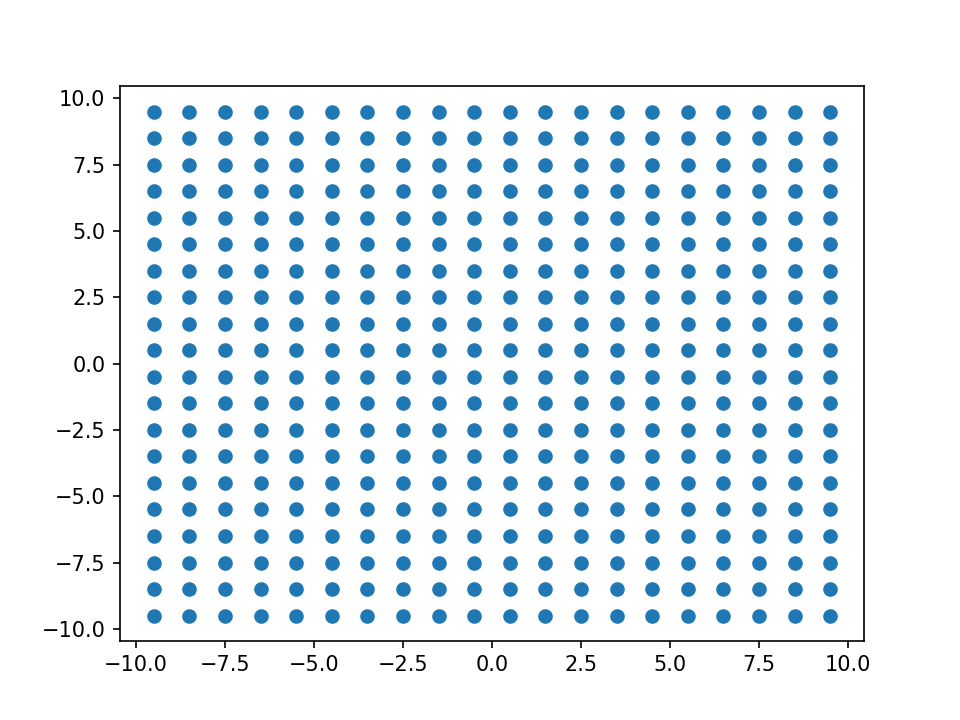

<IPython.core.display.Javascript object>


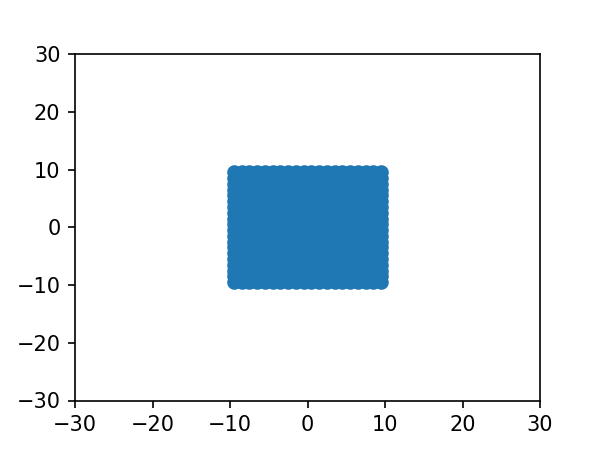

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt 

clay = Clay()
clay.set_particle_square()
clay.make_area()
# print(clay.clay_area_2D[0:3, 0:3])
mouse = Finger(pos = np.array([10, 0]))
fingers = [mouse]
# clay.simulate(fingers)

def motion(event):  
    x = event.xdata
    y = event.ydata
    mouse.pos = np.array([x, y])
    print(2)
    fingers = [mouse]
    clay.simulate(fingers)
    x_d = np.append(clay.clay_particles_pos[:,0], x)
    y_d = np.append(clay.clay_particles_pos[:,1], y)
    ln.set_data(x_d, y_d)
#     ln.set_data(x,y)
    plt.draw()
    plt.pause(0.01)



    

plt.figure(figsize=(4.0, 3.0))
plt.xlim([-30,30])
plt.ylim([-30,30])

ln, = plt.plot(clay.clay_particles_pos[:,0], clay.clay_particles_pos[:,1],'o')
# ln, = plt.plot([], [],'o', markersize=20)

# plt.connect('motion_notify_event', motion)
# plt.show()

<IPython.core.display.Javascript object>


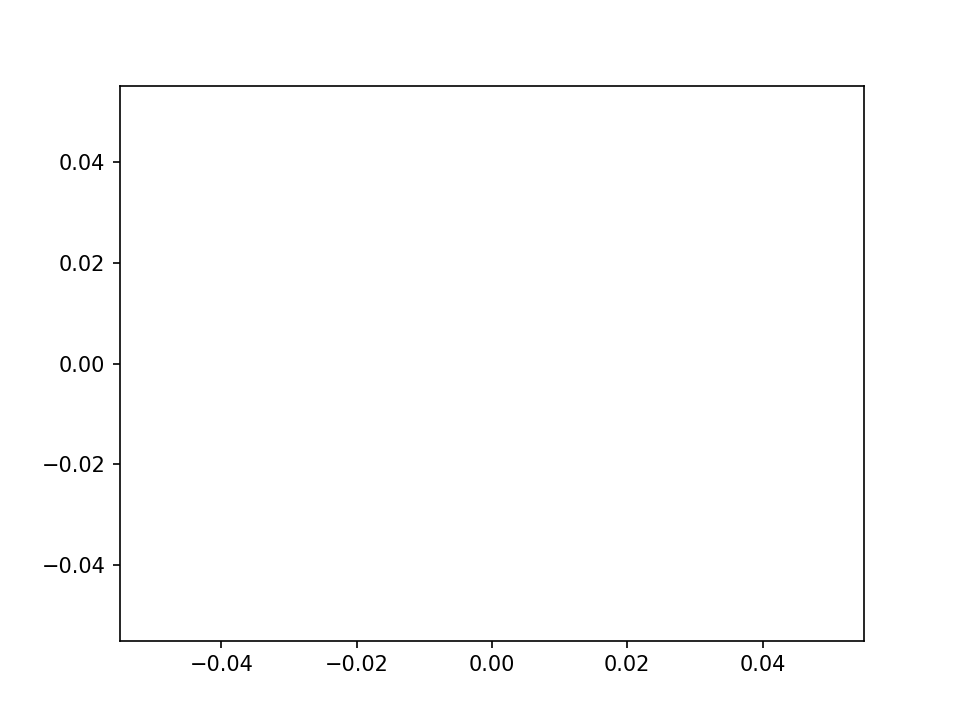

In [52]:
import matplotlib.pyplot as plt 

def motion(event):  
    x = event.xdata
    y = event.ydata

    ln.set_data(x,y)
    plt.draw()

plt.figure()
ln, = plt.plot([],[],'x',  markersize=2000)

plt.connect('motion_notify_event', motion)
plt.show()